# Shopping Sales Analysis

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sales.csv', index_col=False)
df.dropna(axis=0, how='any', inplace=True) # drop any NaN values
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find the month that records the most sales revenue in 2019.

In [3]:
df = df[df['Order Date'].str[0:2] != 'Or'] # remove rows that contains unnecessary string
df['Month'] = df['Order Date'].str[0:2].astype('int8') # add 'Month' column
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [4]:
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered'])
df['Price Each'] = pd.to_numeric(df['Price Each'])
df['Sales'] = df['Quantity Ordered'] * df['Price Each'] # add 'Sales' column
df = df.reindex(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Month', 'Purchase Address'], axis=1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"


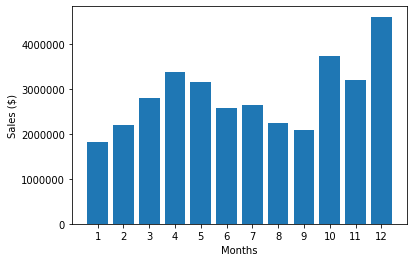

In [5]:
sales_month_result = df.groupby('Month').sum()['Sales']
months = range(1, 13)

plt.bar(months, sales_month_result)
plt.xticks(months)
plt.xlabel('Months')
plt.ylabel('Sales ($)')
plt.ticklabel_format(style='plain') # disable scientific notation on the y-axis
plt.show()

### Find the city that achieved the most sales revenue in 2019.

In [6]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") # add 'City' column
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


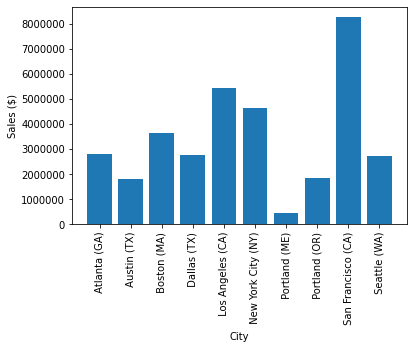

In [7]:
sales_city_result = df.groupby('City').sum()['Sales']

cities = [city for city, df in df.groupby('City')]

plt.bar(cities, sales_city_result)
plt.xticks(rotation='vertical')
plt.xlabel('City')
plt.ylabel('Sales ($)')
plt.ticklabel_format(axis='y', style='plain')
plt.show()

### Find a particular time period where customers are most likely to purchase.

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date']) # use pd.to_datetime() to convert string object 'Order Date' to datetime object
df['Hour'] = df['Order Date'].dt.hour # add 'Hour' column
df = df.reindex(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Sales', 'Order Date', 'Hour', 'Month', 'Purchase Address', 'City'], axis=1)
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Hour,Month,Purchase Address,City
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,8,4,"917 1st St, Dallas, TX 75001",Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,22,4,"682 Chestnut St, Boston, MA 02215",Boston (MA)
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,14,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,14,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,9,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA)


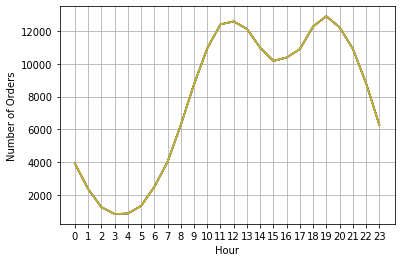

In [9]:
hours = [hour for hour, df in df.groupby('Hour')]
orders = df.groupby('Hour').count()

plt.plot(hours, orders)
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

The above plot shows that customers are purchasing their products mostly at 12pm and 7pm. So, it is optimal to display advertisements at around 12pm and 7pm to maximize the sales.

### Find products that are most likely to purchase together.

In [10]:
orders = df[df.duplicated(subset=['Order ID'], keep=False)]

In [11]:
from itertools import combinations
from collections import Counter

count = Counter()
orders = orders.groupby(['Order ID'])['Product'].apply(','.join).reset_index()

for row in orders['Product']:
    products = row.split(',')
    count.update(Counter(combinations(products, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


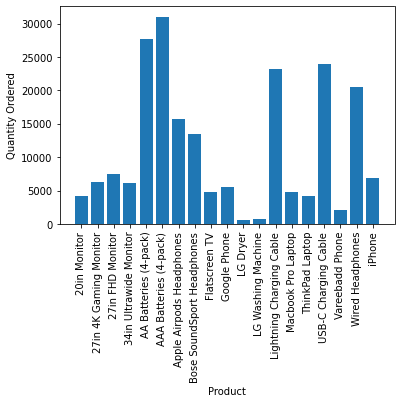

In [12]:
quantities = df.groupby(['Product']).sum()['Quantity Ordered']
products = [product for product, df in df.groupby(['Product'])]

plt.bar(products, quantities)
plt.xticks(rotation='vertical')
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.show()

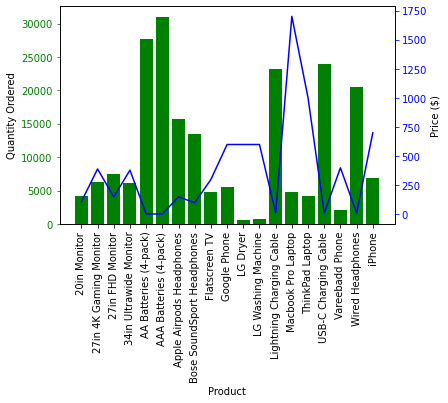

In [13]:
prices = df.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.bar(products, quantities, color='g')
ax1.set_ylabel('Quantity Ordered')
ax1.tick_params(axis='y', colors='g')

ax2.plot(products, prices, color='b')
ax2.set_ylabel('Price ($)')
ax2.tick_params(axis='y', colors='b')

ax1.set_xlabel('Product')
ax1.tick_params(axis='x', labelrotation=90)

plt.show()